Final hidden weights:  [[-2.27033967  3.97308508  2.85929157  2.59531815 -3.26074378 -4.05514614
  -7.27638202  1.00029193 -3.77429472 -7.4250804 ]
 [-3.04842887  3.49340155  2.01558657 -4.94798761 -2.55185655 -3.60874684
  -7.36653216 -0.0743219  -3.40212908 -7.79743856]]
Final hidden biases:  [ 4.22318669 -5.69528834 -3.78013612 -1.17905358  4.45259893  5.84958603
  3.33597266 -0.02092723  5.52349988  3.50942936]
Final output weights:  [[ 1.29466233]
 [-3.63062042]
 [-2.70958028]
 [ 1.86880326]
 [ 2.45479311]
 [ 3.21931929]
 [-6.82225345]
 [-0.725369  ]
 [ 2.32303217]
 [-6.72827267]]
Final output biases:  [-1.44145882]
Predicted outputs:  [0 1 1 0]
Accuracy:  1.0


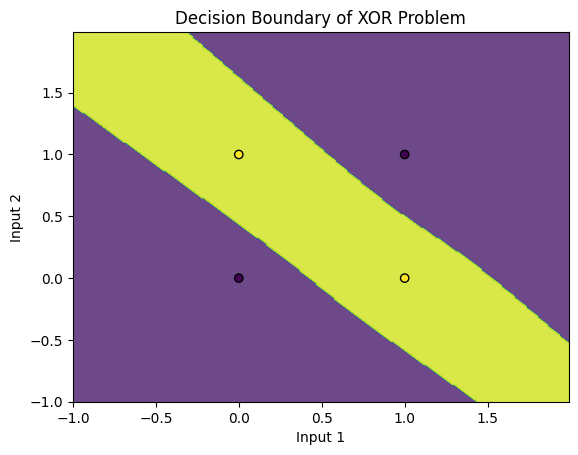

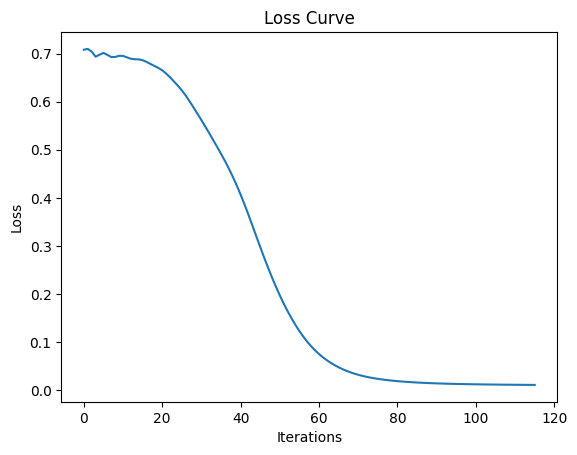

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize the MLPClassifier with one hidden layer of sufficient neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=10000, random_state=42, learning_rate_init=0.1)

# Train the neural network
mlp.fit(X, y)

# Predict the outputs
y_pred = mlp.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Print the final weights, biases, and accuracy
print("Final hidden weights: ", mlp.coefs_[0])
print("Final hidden biases: ", mlp.intercepts_[0])
print("Final output weights: ", mlp.coefs_[1])
print("Final output biases: ", mlp.intercepts_[1])
print("Predicted outputs: ", y_pred)
print("Accuracy: ", accuracy)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Boundary of XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
